# Evaluation of Speed Dating

##### Daniel Wu, Cheuk-lun Cheung, Sarah Ye, Mukund Patil

#### Graph Questions:
SAMPLE GRAPH:
Age of Self Vs Age of Partner - Match or no 

What traits are shown in the men/women with the highest success rate? If we were to build an ideal man/woman, which of these traits in which combination should we use?

 
* age: Age of self
* age_o: Age of partner
* attractive_important: What do you look for in a partner - attractiveness
* sincere_important: What do you look for in a partner - sincerity
* intellicence_important: What do you look for in a partner - intelligence
* funny_important: What do you look for in a partner - being funny
* ambtition_important: What do you look for in a partner - ambition
* sharedinterestsimportant: What do you look for in a partner - shared interests
Confidence:
* attractive: Rate yourself - attractiveness
* sincere: Rate yourself - sincerity
* intelligence: Rate yourself - intelligence						
* funny: Rate yourself - being funny
* ambition: Rate yourself - ambitio
* expectednuminterestedinme: Out of the 20 people you will meet, how many do you expect will be interested in dating you?
* expectednummatches: How many matches do you expect to get?
* guessprobliked: How likely do you think it is that your partner likes you?
* decision_o: Decision of partner at night of event.

#### Introduction:

In this day and age, finding love may be hard for many individuals. Due to this struggle, many people have turned to speed dating as a possible solution. Speed dating is a formal matchmaking process where a number of people meet prospective partners in a short amount of time. In this project, we will be exploring a dataset from a speed dating experiment to answer the question of what would be the most appealing traits in men and women. In other words, 

What type of traits would an ideal man/woman possess that have proven to give a higher chance of being said yes to? 

The dataset itself consists of a number of traits that people possess, such as intelligence, sincerity, etc (rated on a scale of 1-10). 

#### Methods:
We will graph these traits as numerical values against each other and colour by the answer of the date (yes/no). We will then observe the graph and find the area with the highest concentration of yes’s, and use classification on this area with multiple training sets to prove our hypotheses. We will do this on a multitude of graphs until we find the optimal range for each trait. The main method we are planning on using to visualize our data is through scatterplots with the geom_point() function.

#### Expected Outcomes and Significance: 
Generally, the consensus evidently displays:
A greater personal confidence results in more matches 
A greater personal income results in more matches
A lower age (18+) and lower age difference results in more matches
A higher pickiness in criteria results to fewer matches
Through social norms, it is said that containing positive traits and having fewer negative traits (such as the ones stated above) will result in more leniency and preference when it comes to being selected as a partner. We believe that this will stand true to all traits being analyzed in our report. 

These findings will generate trends and provide advice to improve one’s speed dating profile and abilities. They are able to improve traits to work on, find out their personal preferences, weakness, strengths, and much more. 

With the findings of which traits are most ideal at what level, we are able to develop further questions in relation to our traits such as:
What traits generate the greatest influence when it comes to matches?
Are positive and negative traits related to certain occupations?
Which age demographic contains the most attractive traits for a speed dating profile? 

In [1]:
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

Rows: 8378 Columns: 195
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (4): field, undergra, from, career
dbl (187): iid, id, gender, idg, condtn, wave, round, position, positin1, or...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,age_o,match
<dbl>,<dbl>,<dbl>
21,27,0
21,22,0
21,25,0
⋮,⋮,⋮
25,23,1
25,27,1
25,25,1


Warning message:
“Removed 143 rows containing missing values (geom_point).”


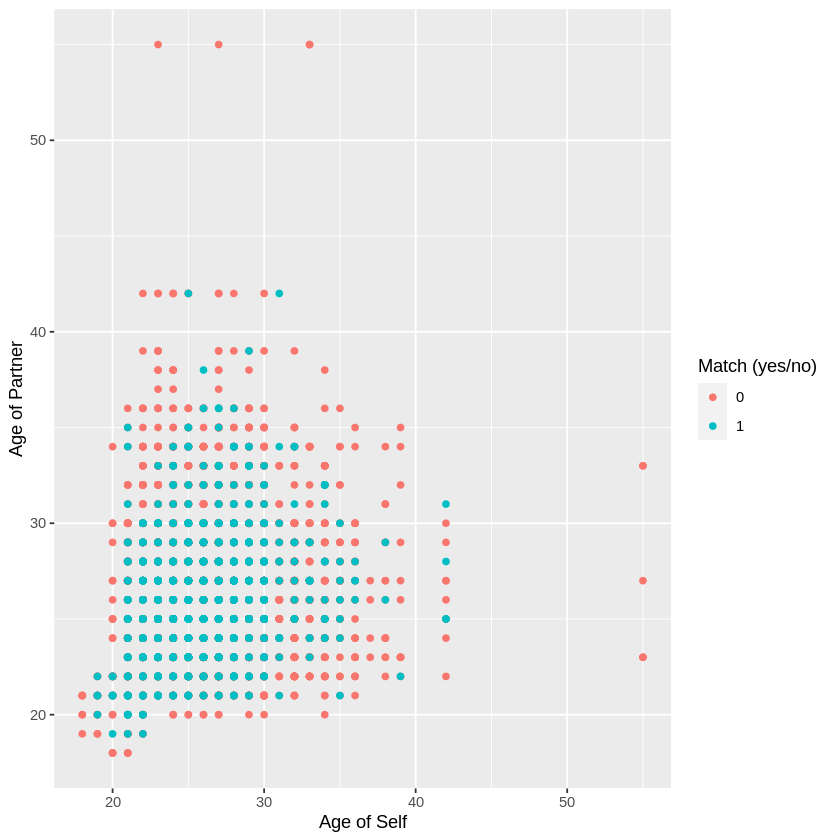

In [2]:
speed_dating <- read_csv("https://raw.githubusercontent.com/Cheuklun/DCSI-Group-Project-/main/Speed%20Dating%20Data.csv")
speed_dating_sample <- speed_dating |> 
    select(age, age_o, match)
speed_dating_split <- initial_split(speed_dating_sample, prop = 0.75, strata = match)
speed_dating_train <- training(speed_dating_split)
speed_dating_test <- testing(speed_dating_split)

speed_dating_train

sample_plot <- ggplot(speed_dating_train, aes(x = age, y = age_o, color = as_factor(match))) +
    geom_point() +
    labs(x = "Age of Self",y = "Age of Partner", color = "Match (yes/no)")
sample_plot